In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('HTRU_2.csv')

In [4]:
data.head()

,IP_Mean,IP_std,IP_Exc_Kurtosis,IP_Skewness,DM-SNR_Mean,DM-SNR_std,DM-SNR_Exc_Kurtosis,DM-SNR_Skewness,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [5]:
data.apply(lambda x:sum(x.isnull()))

IP_Mean                0
IP_std                 0
IP_Exc_Kurtosis        0
IP_Skewness            0
DM-SNR_Mean            0
DM-SNR_std             0
DM-SNR_Exc_Kurtosis    0
DM-SNR_Skewness        0
class                  0
dtype: int64

In [7]:
x=data.iloc[ : ,1:-1]

In [8]:
x.head()

,IP_std,IP_Exc_Kurtosis,IP_Skewness,DM-SNR_Mean,DM-SNR_std,DM-SNR_Exc_Kurtosis,DM-SNR_Skewness
0,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


In [9]:
y = data['class']

In [10]:
y.tail()

17893    0
17894    0
17895    0
17896    0
17897    0
Name: class, dtype: int64

In [11]:
data['class'].value_counts()

0    16259
1     1639
Name: class, dtype: int64

In [13]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
parameters = {"criterion": ["gini", "entropy"],
              "min_samples_split": randint(2, 20),
              "max_depth": randint(5, 10),
              "min_samples_leaf": randint(1, 20),
              "max_leaf_nodes": randint(10, 20)}

clf = DecisionTreeClassifier()

In [24]:
from sklearn.model_selection import RandomizedSearchCV
best_param = RandomizedSearchCV(clf,param_distributions=parameters,scoring = "accuracy",cv=10,n_iter=20)

In [25]:
best_param.fit(x,y) 

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=20, n_jobs=None,
          param_distributions={'criterion': ['gini', 'entropy'], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000AAE9CE7860>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000AAE9CE7940>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000AAE9CE7B38>, 'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000AAE9CE7CC0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,

In [26]:
best_param.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=12,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=11, min_samples_split=6,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
best_param.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_leaf_nodes': 12,
 'min_samples_leaf': 11,
 'min_samples_split': 6}

In [32]:
best_param.best_score_

0.9792155548105934

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [37]:
print(x_train.shape)   
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14318, 7)
(3580, 7)
(14318,)
(3580,)


In [39]:
classifier = DecisionTreeClassifier(criterion='gini',max_depth=9,
                                    max_leaf_nodes=12,min_samples_leaf=11,
                                    min_samples_split=6)

In [40]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=12,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=11, min_samples_split=6,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
y_pred = classifier.predict(x_test)

In [52]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [53]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.9798882681564246


In [67]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Not Pulsar', 'Predicted Pulsar'],
    index=['Not Pulsar', 'Pulsar']
)

,Predicted Not Pulsar,Predicted Pulsar
Not Pulsar,3215,22
Pulsar,50,293


In [68]:
cm = confusion_matrix(y_test,y_pred)

In [69]:
cm.shape

(2, 2)

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion matrix,without normalization')
    
    print(cm)
    
    thresh = cm.max()/2,
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        
        plt.text(j,i,cm[i,j],
                horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix,without normalization
[[3215   22]
 [  50  293]]


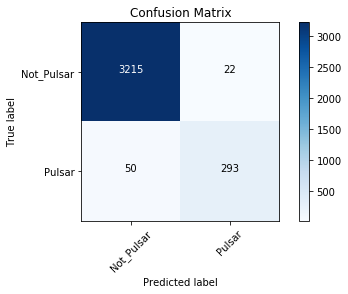

In [71]:
cm_plot_labels = ['Not_Pulsar','Pulsar']
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion Matrix')